<a href="https://colab.research.google.com/github/reasonj11/Machine-learning/blob/main/4-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
 from sklearn import datasets
 from sklearn import tree
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.svm import SVC
 from sklearn.ensemble import VotingClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score
 import numpy as np
 import matplotlib.pyplot as plt

In [16]:
np.random.seed(5)
mnist= datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train,X_test,y_train,y_test=train_test_split(features,labels,
                                              test_size=0.2)

In [17]:
dtree= tree.DecisionTreeClassifier(
criterion="gini", max_depth=8, max_features=32)

dtree= dtree.fit(X_train, y_train)
dtree_predicted= dtree.predict(X_test)

knn= KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted= knn.predict(X_test)

svm= SVC(C=0.1, gamma=0.003,
probability=True).fit(X_train, y_train)
svm_predicted= svm.predict(X_test)

In [18]:
print("[accuarcy]")
print("d-tree: ", accuracy_score(y_test, dtree_predicted))
print("knn : ", accuracy_score(y_test, knn_predicted))
print("svm : ", accuracy_score(y_test, svm_predicted))

[accuarcy]
d-tree:  0.7916666666666666
knn :  0.8944444444444445
svm :  0.8916666666666667


In [19]:
svm_proba= svm.predict_proba(X_test)
print(svm_proba[0:2])

[[0.0020036  0.00913495 0.00860886 0.00431856 0.0047931  0.8975483
  0.0019513  0.01046554 0.04855539 0.0126204 ]
 [0.00290208 0.01165787 0.86869732 0.00809384 0.00503728 0.01857273
  0.00301187 0.00945009 0.05716773 0.0154092 ]]


In [22]:
voting_model = VotingClassifier(estimators=[
    ('Decision_Tree', dtree), ('k-NN', knn), ('SVM', svm)],
    weights=[1,1,1], voting='hard')
voting_model.fit(X_train, y_train)
hard_voting_predicted = voting_model.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9277777777777778

In [24]:
voting_model = VotingClassifier(estimators=[
    ('Decision_Tree', dtree), ('k-NN', knn), ('SVM', svm)],
    weights=[1,1,1], voting='soft')
voting_model.fit(X_train, y_train)
soft_voting_predicted = voting_model.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9

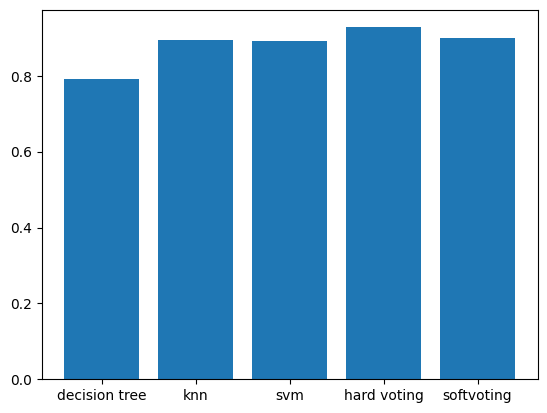

In [26]:
x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','softvoting']);